In [2]:
import cv2 
import numpy as np
import os
if os.name =="window" or os.name =="linux": # MacOS: posix
    import matplotlib.pylab as plt
    
import matplotlib.pylab as plt
import math 
from function import Region
from function import Contour
from function import Image
import dis
import numba 
import time

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

## Functions and Attributes of Functions
* *args and **kwargs key word
```
*args
**kwargs
```
* Somes Attribute of Functions
```
0. __doc__ 
1. __code__.co_code 
2. __code__.co_varnames
3. __defaults__
4. __name__
5. __code__.co_argcount 
```

In [3]:
def funtions(*args, **kwargs): 
    """
        *args; x , 
        **kwargs: name ="iuh"
    """
    
    print(args)
    print("-----------")
    print(kwargs)
    
    
    
funtions(10, 20, 300, name ="image", last_name = "o", x = 10)
    

(10, 20, 300)
-----------
{'name': 'image', 'last_name': 'o', 'x': 10}


In [4]:
def tinhtong(a, b = 10):
    """
    Return sum a and b
    
    Parameters:
        a (int, float, double): First number
        b (int, float, double): Second number
    
    Return:
        return a+b (int, double, float): Sum of a, b
    
    """
    
    return a +b

print(tinhtong.__doc__)


    Return sum a and b
    
    Parameters:
        a (int, float, double): First number
        b (int, float, double): Second number
    
    Return:
        return a+b (int, double, float): Sum of a, b
    
    


In [5]:
print(tinhtong.__code__.co_code)

b'|\x00|\x01\x17\x00S\x00'


In [6]:
dis.dis(tinhtong)

 14           0 LOAD_FAST                0 (a)
              2 LOAD_FAST                1 (b)
              4 BINARY_ADD
              6 RETURN_VALUE


In [7]:
print(tinhtong.__doc__)


    Return sum a and b
    
    Parameters:
        a (int, float, double): First number
        b (int, float, double): Second number
    
    Return:
        return a+b (int, double, float): Sum of a, b
    
    


In [8]:
print(tinhtong.__code__.co_argcount)
print(tinhtong.__defaults__)
print(tinhtong.__code__.co_varnames)

2
(10,)
('a', 'b')


In [9]:
from function import Region

print(Region.SelectShape.__code__.co_varnames)
print(Region.SelectShape.__defaults__)
print(Region.SelectShape.__name__)
print(Region.SelectShape.__doc__)

('threshold', 'min_value', 'max_value', 'feature', 'number_object', 'labels', 'stats', '_', 'list_width', 'list_height', 'list_area', 'result', 'list_output_width', 'list_output_height', 'list_output_area', 'list_region', 'idx', 'width', 'height', 'area', 'select_object')
('width',)
SelectShape
None


## Calculate Time

* Calculate execution time of functions or block code
* Using time.time
  ```
  t0 = time.time()
  t1 = time.time()
  delta_t = t1 - t0 (seconds)
  ```

In [10]:
def sumC(n =1000):
    s =0 
    for i in range(n):
        s += i**2
        
    return s

t0 = time.time()
# Do something
sumC(10000)
    
t1 = time.time()
print(f'Time execution: {(t1-t0)*1000} (ms)')

Time execution: 2.001047134399414 (ms)


In [11]:
t0 = time.time()
# Do something
sumC(10000)
t1 = time.time()
print(f'Time execution: {(t1-t0)*1000} (ms)')

Time execution: 1.9993782043457031 (ms)


## Decorator
```
@decorator
```
1. Apply decorator to calculate time execution
2. Calclate time execution of some functions

#### Fucntions as object

In [12]:
def tinhtong(a, b):
    return a +b 

call_tinh_tong  = tinhtong
call_tinh_tong (1,2)

3

#### Passing functions as arguments

In [13]:
def call_tinh_tong(func):
    
    return func(20, 20)

call_tinh_tong(tinhtong)

40

#### Return functions in functions

In [14]:
def call_tinh_tong(x): 
    
    def tinhtong(y):  # tinhtong la mot ham can optimize
        
        t0 = time.time()
        tong =x +y 
        t1 = time.time()
        print(f'This {tinhtong.__name__} functions took : {round((t1-t0)*1000, 4)} (ms)')
        return 
    
    return tinhtong

get_tinh_tong = call_tinh_tong(10)

print(get_tinh_tong(20))

This tinhtong functions took : 0.0 (ms)
None


In [30]:
def timer(func):
    def wrapper( *args, **kwargs):
        
        #print(f'args of function {func.__name__}: {args}')
        #print(f'kwargs of function {func.__name__}: {kwargs}')
        
        t0 = time.time()
        result = func(*args, **kwargs)
        t1 =time.time()
        
        print(f'Function {func.__name__} took: {round((t1-t0)* 1000, 4)} (ms)')
        return result
    return wrapper     

@timer
def tinh_sigmal(x, y):
    s = 0
    for i in range(x+y):
        s +=1 
    return s


call_tinh_sigmal = tinh_sigmal 

call_tinh_sigmal(10000, y =2000)

Function tinh_sigmal took: 0.0 (ms)


12000

### Example (MinDistance between two contours)

2
[[[613 265]]

 [[612 266]]

 [[611 266]]

 ...

 [[616 265]]

 [[615 265]]

 [[614 265]]]


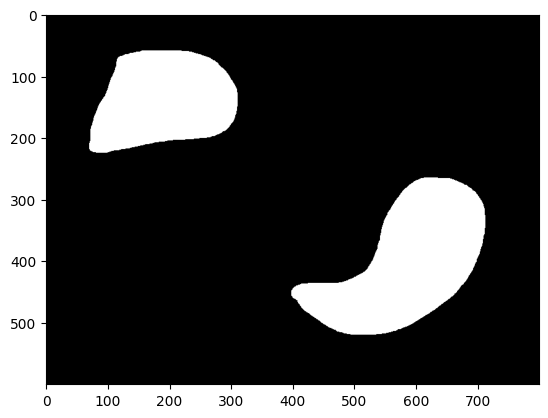

In [16]:

img = cv2.imread("images/shape11_2.png")

gray = cv2.imread("images/shape11_2.png",0)
_, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
show(threshold)
print(len(contours))
print(contours[0])

In [17]:
cnt1 = contours[0]
cnt1 = np.squeeze(contours[0], axis = 1)
x = cnt1[0][0]
y = cnt1[0][1]
print(x, y)
print(cnt1[0])

613 265
[613 265]


In [18]:
@timer
def min_contours_distance(contour1, contour2):

    number_point_contour1 = len(contour1)
    number_point_contour2 = len(contour2)
    
    point1_min_x = 0
    point1_min_y = 0
    
    point2_min_x = 0
    point2_min_y = 0
    
    min_distance = 1e8
    
    for i in range(number_point_contour1):
        for j in range(number_point_contour2):
            
            point1  = contour1[i]
            point2  = contour2[j]
            
            x1, y1 = point1[0], point1[1]
            x2, y2 = point2[0], point2[1]
                        
            dis = math.sqrt((x1-x2)**2 + (y1-y2)**2)
            
            if dis < min_distance :
                min_distance = dis 
                
                point1_min_x, point1_min_y = point1[0], point1[1]
                point2_min_x, point2_min_y = point2[0], point2[1]

    print((point1_min_x, point1_min_y))
    print((point2_min_x, point2_min_y))
    return min_distance , (point1_min_x, point1_min_y),(point2_min_x, point2_min_y)

In [290]:
cnt1 = np.squeeze(contours[0], axis = 1)
cnt2 = np.squeeze(contours[1], axis = 1)

minDis = min_contours_distance(cnt1, cnt2)
print(minDis)

args of function min_contours_distance: (array([[613, 265],
       [612, 266],
       [611, 266],
       ...,
       [616, 265],
       [615, 265],
       [614, 265]], dtype=int32), array([[155,  59],
       [154,  60],
       [153,  60],
       ...,
       [158,  59],
       [157,  59],
       [156,  59]], dtype=int32))
kwargs of function min_contours_distance: {}
(406, 440)
(282, 193)
Function min_contours_distance took: 975.5771 (ms)
(276.3783638420345, (406, 440), (282, 193))


### Draw minimum distance

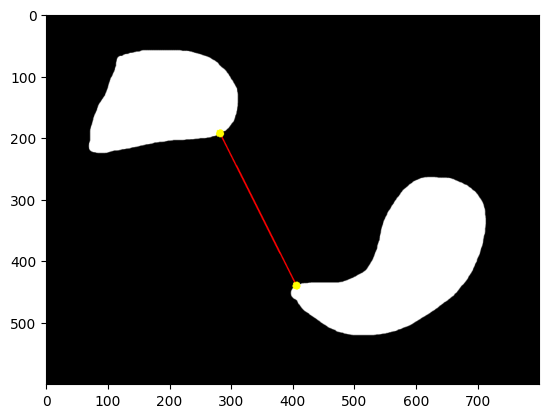

In [20]:
img_copy = img.copy()

cv2.line(img_copy, (406, 440), (282, 193), (0,0,255), 2)
cv2.circle(img_copy , (406, 440), 3, (0,255,255), 5)
cv2.circle(img_copy , (282, 193), 3, (0,255,255), 5)

showC(img_copy)

### Find minimum in numpy

In [21]:
cnt = contours[0]
print(cnt.shape)

(815, 1, 2)


In [22]:
a = np.array([12,2,3,5,1])

print(np.amin(a))
print(np.argmin(a))

1
4


In [298]:
@timer
def min_contours_distance_numpy(contours1:np.array, contours2:np.array) -> (np.array,np.array):
    contours1 = contours1.astype(np.float32)
    contours2 = contours2.astype(np.float32)
    
    min_distance    = np.empty(len(contours1), dtype = np.float32)
    pointIndex    = np.empty(len(contours1) , dtype = np.float32)
    
    x_2 = contours2[: ,0, 0]
    y_2 = contours2[: ,0, 1]
    
    for i in range(len(contours1)):
        
        x_1 = contours1[i, 0, 0]
        y_1 = contours1[i, 0, 1]

        diff_x = x_1 - x_2 
        diff_y = y_1 - y_2
        
        dis = diff_x**2  + diff_y**2
        
        min_distance[i]     = np.sqrt(np.amin(dis))
        pointIndex [i]     = np.argmin(dis)
        
    return min_distance, pointIndex

In [295]:
min_distance, pointIndex = min_contours_distance_numpy(contours[0],contours[1])

index_point_contour1 = np.argmin(min_distance)
index_point_contour2 = int(pointIndex[index_point_contour1])

print(index_point_contour1)
print(index_point_contour2)
# (406, 440), (282, 193)


Function min_contours_distance_numpy took: 18.1441 (ms)
276
399


In [179]:
point1 = contours[0][index_point_contour1].tolist()[0]
point2 = contours[1][index_point_contour2].tolist()[0]
print(point1)
print(point2)

[406, 440]
[282, 193]


### Draw result

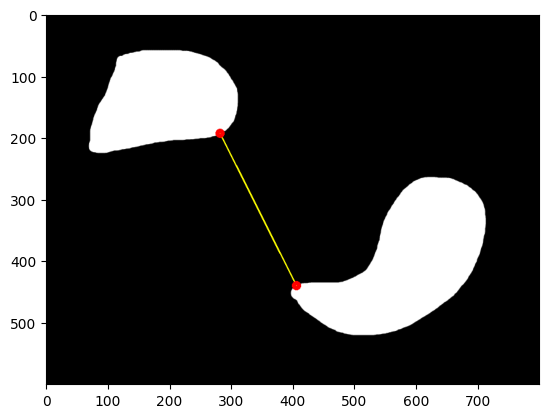

In [187]:
img_copy = img.copy()

cv2.line(img_copy, tuple(point1), tuple(point2), (0,255,255), 2)
cv2.circle(img_copy , tuple(point1), 4, (0,0,255), 6)
cv2.circle(img_copy , tuple(point2), 4, (0,0,255), 6)

showC(img_copy)

## Python Compilation/Interpretation Process
1. Assumption have fibonacy functions and Bytecode 

In [25]:
def fibonacy(x):
    if x==1 or x ==2 :return 1
    return fibonacy (x-2) + fibonacy (x-1)

def factorial(x):
    if x == 0: return 1
    return x * factorial(x-1)

In [26]:
# This is byteCode 
dis.dis(fibonacy) 

  2           0 LOAD_FAST                0 (x)
              2 LOAD_CONST               1 (1)
              4 COMPARE_OP               2 (==)
              6 POP_JUMP_IF_TRUE        16
              8 LOAD_FAST                0 (x)
             10 LOAD_CONST               2 (2)
             12 COMPARE_OP               2 (==)
             14 POP_JUMP_IF_FALSE       20
        >>   16 LOAD_CONST               1 (1)
             18 RETURN_VALUE

  3     >>   20 LOAD_GLOBAL              0 (fibonacy)
             22 LOAD_FAST                0 (x)
             24 LOAD_CONST               2 (2)
             26 BINARY_SUBTRACT
             28 CALL_FUNCTION            1
             30 LOAD_GLOBAL              0 (fibonacy)
             32 LOAD_FAST                0 (x)
             34 LOAD_CONST               1 (1)
             36 BINARY_SUBTRACT
             38 CALL_FUNCTION            1
             40 BINARY_ADD
             42 RETURN_VALUE


In [27]:
dis.dis(factorial)

  6           0 LOAD_FAST                0 (x)
              2 LOAD_CONST               1 (0)
              4 COMPARE_OP               2 (==)
              6 POP_JUMP_IF_FALSE       12
              8 LOAD_CONST               2 (1)
             10 RETURN_VALUE

  7     >>   12 LOAD_FAST                0 (x)
             14 LOAD_GLOBAL              0 (factorial)
             16 LOAD_FAST                0 (x)
             18 LOAD_CONST               2 (1)
             20 BINARY_SUBTRACT
             22 CALL_FUNCTION            1
             24 BINARY_MULTIPLY
             26 RETURN_VALUE
